<a href="https://colab.research.google.com/github/rahul25012003/TU-DORTMUND-FINAL-REPORT/blob/main/TU_DORTMUND_REPORT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Load the CSV file
df = pd.read_csv('/content/sandwich.csv')

In [4]:
# Show the first few rows
print("Data Preview:")
print(df.head(), "\n")

Data Preview:
   antCount        bread           topping butter
0        34          Rye  Ham and gherkins     no
1        47  Multi Grain     Peanut butter    yes
2        67        White  Ham and gherkins    yes
3        63  Multi Grain  Ham and gherkins    yes
4        65          Rye  Ham and gherkins     no 



In [6]:
# Descriptive statistics
print("Descriptive statistics by Bread Type:")
print(df.groupby('bread')['antCount'].describe(), "\n")

Descriptive statistics by Bread Type:
             count   mean        std   min    25%   50%    75%   max
bread                                                               
Multi Grain   12.0  43.00  18.230843  19.0  27.50  40.0  59.25  76.0
Rye           12.0  44.25  13.396913  21.0  35.50  42.0  57.25  65.0
White         12.0  42.25  15.863767  18.0  30.00  44.5  51.00  67.0
Whole Grain   12.0  44.50  14.606972  21.0  36.25  48.0  54.00  66.0 



In [7]:
print("Descriptive statistics by Topping:")
print(df.groupby('topping')['antCount'].describe(), "\n")

Descriptive statistics by Topping:
                  count    mean        std   min    25%   50%    75%   max
topping                                                                   
Ham and gherkins   16.0  55.500  12.055428  34.0  47.00  58.5  65.00  76.0
Peanut butter      16.0  40.375  14.183911  19.0  26.25  44.5  50.25  60.0
Yeast spread       16.0  34.625  11.158704  18.0  25.75  34.5  42.00  57.0 



In [8]:
print("Descriptive statistics by Butter:")
print(df.groupby('butter')['antCount'].describe(), "\n")

Descriptive statistics by Butter:
        count    mean        std   min    25%   50%    75%   max
butter                                                          
no       24.0  38.125  14.072213  18.0  24.75  37.0  48.00  65.0
yes      24.0  48.875  14.513300  22.0  40.75  49.0  59.25  76.0 



In [9]:
# Visualizations
sns.set(style="whitegrid")

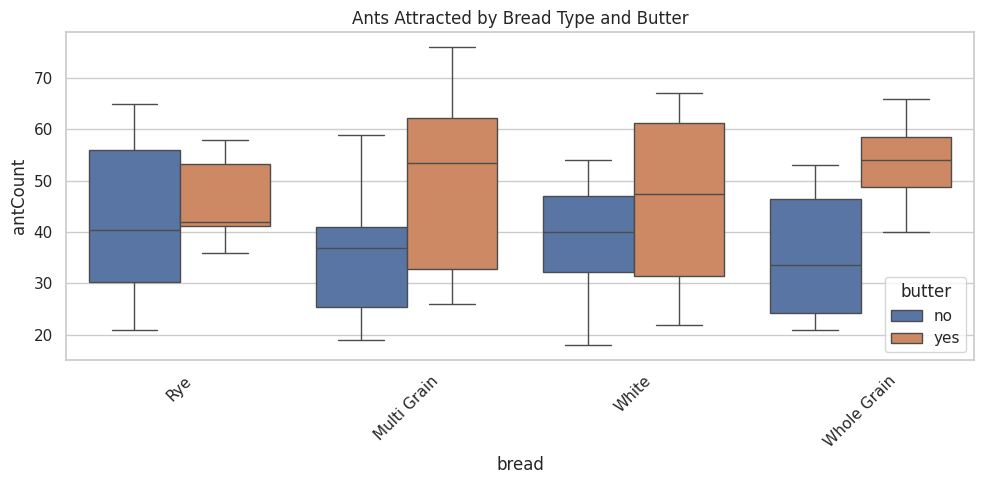

In [11]:
# Boxplot by BreadType
plt.figure(figsize=(10, 5))
sns.boxplot(x='bread', y='antCount', hue='butter', data=df)
plt.title('Ants Attracted by Bread Type and Butter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

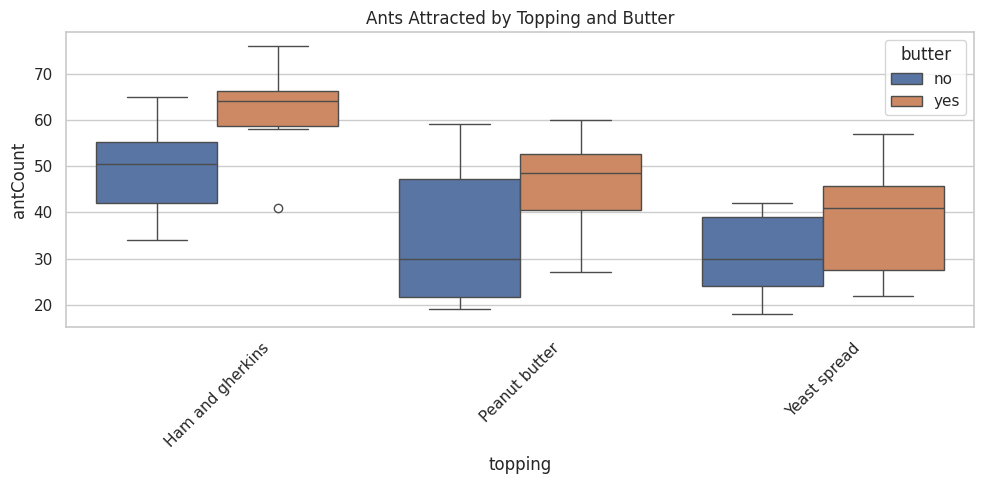

In [12]:
# Boxplot by Topping
plt.figure(figsize=(10, 5))
sns.boxplot(x='topping', y='antCount', hue='butter', data=df)
plt.title('Ants Attracted by Topping and Butter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# ANOVA test
model = ols('antCount ~ C(bread) + C(topping) + C(butter)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
             sum_sq    df          F    PR(>F)
C(bread)      40.50   3.0   0.098169  0.960593
C(topping)  3720.50   2.0  13.527291  0.000031
C(butter)   1386.75   1.0  10.084113  0.002838
Residual    5638.25  41.0        NaN       NaN


In [15]:
# Post-hoc Tukey test for BreadType
print("\nTukey HSD for BreadType:")
tukey_bread = pairwise_tukeyhsd(df['antCount'], df['bread'])
print(tukey_bread)


Tukey HSD for BreadType:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Multi Grain         Rye     1.25 0.9973 -15.7843 18.2843  False
Multi Grain       White    -0.75 0.9994 -17.7843 16.2843  False
Multi Grain Whole Grain      1.5 0.9954 -15.5343 18.5343  False
        Rye       White     -2.0 0.9892 -19.0343 15.0343  False
        Rye Whole Grain     0.25    1.0 -16.7843 17.2843  False
      White Whole Grain     2.25 0.9848 -14.7843 19.2843  False
---------------------------------------------------------------


In [16]:
# Post-hoc Tukey test for Topping
print("\nTukey HSD for Topping:")
tukey_topping = pairwise_tukeyhsd(df['antCount'], df['topping'])
print(tukey_topping)


Tukey HSD for Topping:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Ham and gherkins Peanut butter  -15.125 0.0038 -25.862  -4.388   True
Ham and gherkins  Yeast spread  -20.875 0.0001 -31.612 -10.138   True
   Peanut butter  Yeast spread    -5.75 0.4037 -16.487   4.987  False
---------------------------------------------------------------------
